<a href="https://colab.research.google.com/github/ayushb2002/sequentialToImage/blob/main/Sequential_Data_to_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import os
from os.path import exists

filepath = '/content/drive/MyDrive/S2I/dataset.csv'
exists(filepath)

True

In [20]:
import pandas as pd

data = pd.read_csv(filepath)

In [21]:
data

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...,...
91,01.08.2022,NaN,NaN,NaN,NaN
92,01.09.2022,NaN,NaN,NaN,NaN
93,01.10.2022,NaN,NaN,NaN,NaN
94,01.11.2022,NaN,NaN,NaN,NaN


In [22]:
data = data.dropna()

In [23]:
data

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007e+07,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759e+07,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715e+07,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458e+07,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148e+07,8620.0,1626.621765,30024676.0
...,...,...,...,...,...
59,01.12.2019,5.875647e+07,38069.0,1543.420464,29878525.0
60,01.01.2020,5.628830e+07,27184.0,2070.640850,29044998.0
61,01.02.2020,4.022524e+07,23509.0,1711.057181,29044998.0
62,01.03.2020,5.002217e+07,32569.0,1535.882748,29044998.0


In [24]:
data["Revenue"] = data["Revenue"]/1e07

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [25]:
data

,Period,Revenue,Sales_quantity,Average_cost,The_average_annual_payroll_of_the_region
0,01.01.2015,1.601007,12729.0,1257.763541,30024676.0
1,01.02.2015,1.580759,11636.0,1358.507000,30024676.0
2,01.03.2015,2.204715,15922.0,1384.697024,30024676.0
3,01.04.2015,1.881458,15227.0,1235.606705,30024676.0
4,01.05.2015,1.402148,8620.0,1626.621765,30024676.0
...,...,...,...,...,...
59,01.12.2019,5.875647,38069.0,1543.420464,29878525.0
60,01.01.2020,5.628830,27184.0,2070.640850,29044998.0
61,01.02.2020,4.022524,23509.0,1711.057181,29044998.0
62,01.03.2020,5.002217,32569.0,1535.882748,29044998.0


In [26]:
!pip install pyts

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.5 MB 5.1 MB/s 


In [28]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from pyts.image import GramianAngularField

In [65]:
X = data.drop(["Period","Revenue"], axis=1)
y = data.Revenue

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.18, shuffle=False)

In [68]:
len(X_train), len(y_train)

(52, 52)

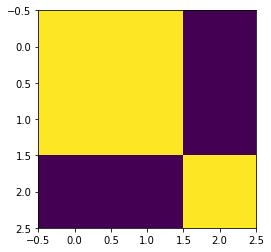

In [69]:
gaf = GramianAngularField(image_size=3)
im_train_gf = gaf.fit_transform(X_train)
im_test_gf = gaf.transform(X_test)

# plot one image
plt.imshow(im_train_gf[0])
plt.show()

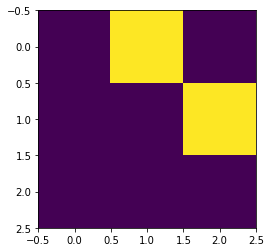

In [70]:
from pyts.image import MarkovTransitionField
import matplotlib.pyplot as plt


mtf = MarkovTransitionField(image_size=3)
im_train_mf = mtf.fit_transform(X_train)
im_test_mf = mtf.transform(X_test)

# plot one image
plt.imshow(im_train_mf[0])
plt.show()

In [71]:
!pip install autokeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [72]:
import tensorflow as tf
import autokeras as ak


In [86]:
reg = ak.ImageRegressor(overwrite=True, max_trials=1)

In [87]:
reg.fit(
    im_train_gf,
    y_train,
    epochs=2,
)

Trial 1 Complete [00h 00m 20s]
val_loss: 13.586199760437012

Best val_loss So Far: 13.586199760437012
Total elapsed time: 00h 00m 20s
INFO:tensorflow:Oracle triggered exit
Epoch 1/2
2/2 [==============================] - 11s 242ms/step - loss: 16.4089 - mean_squared_error: 16.4089
Epoch 2/2
2/2 [==============================] - 1s 254ms/step - loss: 11.8372 - mean_squared_error: 11.8372
INFO:tensorflow:Assets written to: ./image_regressor/best_model/assets


In [88]:
predicted_y = reg.predict(im_test_gf)

1/1 [==============================] - 0s 37ms/step


In [92]:
len(predicted_y)

12

In [90]:
print(reg.evaluate(im_test_mf, y_test))

1/1 [==============================] - 2s 2s/step - loss: 20.7415 - mean_squared_error: 20.7415
[20.741506576538086, 20.741506576538086]


In [91]:
# Test loss and test accuracy

In [93]:
predicted_y, y_test

(array([[0.09469711],
        [0.09469711],
        [0.09469712],
        [0.09469712],
        [0.09469712],
        [0.09469712],
        [0.09469712],
        [0.09469711],
        [0.09469712],
        [0.09469711],
        [0.09469711],
        [0.09469712]], dtype=float32), 52    3.253166
 53    4.770970
 54    4.599214
 55    3.693367
 56    4.852626
 57    4.416042
 58    3.637496
 59    5.875647
 60    5.628830
 61    4.022524
 62    5.002217
 63    5.232069
 Name: Revenue, dtype: float64)

In [94]:
reg2 = ak.ImageRegressor(overwrite=True, max_trials=1)

reg2.fit(
    im_train_mf,
    y_train,
    epochs=2,
)

Trial 1 Complete [00h 00m 20s]
val_loss: 13.062211990356445

Best val_loss So Far: 13.062211990356445
Total elapsed time: 00h 00m 20s
INFO:tensorflow:Oracle triggered exit
Epoch 1/2
2/2 [==============================] - 13s 2s/step - loss: 35.8850 - mean_squared_error: 35.8850
Epoch 2/2
2/2 [==============================] - 4s 2s/step - loss: 7.9969 - mean_squared_error: 7.9969
INFO:tensorflow:Assets written to: ./image_regressor/best_model/assets


In [98]:
predicted_y_mf = reg2.predict(im_test_mf)

1/1 [==============================] - 0s 97ms/step


In [100]:
print(reg2.evaluate(im_test_mf, y_test))

1/1 [==============================] - 2s 2s/step - loss: 19.4346 - mean_squared_error: 19.4346
[19.43463706970215, 19.43463706970215]


In [101]:
predicted_y_mf, y_test

(array([[0.2427579],
        [0.2427579],
        [0.2427579],
        [0.2427579],
        [0.2427579],
        [0.2427579],
        [0.2427579],
        [0.2427579],
        [0.2427579],
        [0.2427579],
        [0.2427579],
        [0.2427579]], dtype=float32), 52    3.253166
 53    4.770970
 54    4.599214
 55    3.693367
 56    4.852626
 57    4.416042
 58    3.637496
 59    5.875647
 60    5.628830
 61    4.022524
 62    5.002217
 63    5.232069
 Name: Revenue, dtype: float64)